In [48]:
# set up reading in data
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

filepath = '../data/matches.csv'
matches = pd.read_csv(filepath)

In [19]:
# here's what our data looks like
print('shape:', matches.shape)
matches.head()

shape: (3804, 196)


,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
0,699451,87,2013,1379960100,FC St. Pauli,Fortuna Düsseldorf,1,1,NaN,NaN,...,0,63,0,248,1,20,23,7,9,2
1,699453,87,2013,1379849400,SG Dynamo Dresden,SC Paderborn 07,2,2,NaN,NaN,...,0,65,0,212,1,12,22,5,17,2
2,699496,87,2013,1383327000,VfR Aalen,Fortuna Düsseldorf,1,0,NaN,NaN,...,0,45,0,198,5,17,21,3,27,2
3,699537,87,2013,1386955800,1. FC Kaiserslautern,SC Paderborn 07,0,1,NaN,NaN,...,0,98,0,383,3,13,17,6,16,4
4,699624,87,2013,1395765000,SC Paderborn 07,FC St. Pauli,3,0,NaN,NaN,...,1,87,0,225,3,20,11,8,16,3


In [20]:
# get rsl's matches
team = 'Real Salt Lake'
rsl_matches = matches[(matches.home_team_name == team) | (matches.away_team_name == team)]
rsl_matches.head()

,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
10,732283,98,2013,1383530400,LA Galaxy,Real Salt Lake,1,0,NaN,NaN,...,1,104,0,332,1,10,2,10,14,2
11,732427,98,2013,1383876000,Real Salt Lake,LA Galaxy,2,0,NaN,NaN,...,0,80,0,330,5,13,3,9,16,2
19,732711,98,2013,1384135200,Real Salt Lake,Portland Timbers,4,2,NaN,NaN,...,0,83,0,255,0,12,5,7,15,0
20,732712,98,2013,1385344800,Portland Timbers,Real Salt Lake,0,1,NaN,NaN,...,0,115,0,317,3,17,4,9,24,1
21,733006,98,2013,1386450000,Sporting Kansas City,Real Salt Lake,1,1,NaN,NaN,...,0,86,0,335,4,20,7,9,21,2


In [22]:
# what years do we have?
rsl_matches.season_id.unique()

array([2013, 2014, 2015, 2016, 2017])

In [28]:
# get just this year
rsl_matches_17 = rsl_matches[rsl_matches.season_id == 2017]
rsl_matches_17.head()

,match_id,competition_id,season_id,date,home_team_name,away_team_name,score_home,score_away,half_score_home,half_score_away,...,home_six_yard_block,home_successful_final_third_passes,home_total_attacking_pass,home_total_fwd_zone_pass,home_total_offside,home_was_fouled,home_won_contest,home_won_corners,home_won_tackle,home_yellow_card
2852,900875,98,2017,1488663000,Real Salt Lake,Toronto FC,0,0,0.0,0.0,...,1,77,0,259,1,14,6,6,14,3
2860,900883,98,2017,1489258800,Chicago Fire,Real Salt Lake,2,0,2.0,0.0,...,0,69,0,215,1,15,7,4,15,0
2896,902139,98,2017,1489887000,Real Salt Lake,LA Galaxy,1,2,1.0,0.0,...,0,49,0,196,4,15,3,5,11,3
2900,902143,98,2017,1490472000,New York Red Bulls,Real Salt Lake,0,0,0.0,0.0,...,1,72,0,268,4,15,10,8,24,1
2906,902150,98,2017,1491091200,Minnesota United FC,Real Salt Lake,4,2,1.0,1.0,...,0,56,0,261,3,14,6,6,15,2


In [35]:
# how many games do we have? do the goals match up? 
# looks like we have rsl's mls games through sep. 16
print('shape', rsl_matches_17.shape)
rsl_matches_17_home = rsl_matches_17[rsl_matches_17.home_team_name == team]
rsl_matches_17_away = rsl_matches_17[rsl_matches_17.away_team_name == team]
print('goals for', rsl_matches_17_home.sum().score_home + rsl_matches_17_away.sum().score_away)
print('goals against', rsl_matches_17_home.sum().score_away + rsl_matches_17_away.sum().score_home)

shape (30, 196)
goals for 44
goals against 52


In [37]:
# let's look at our columns for interesting stuff...
# score_x, x_aerial_won, x_successful_final_third_passes
list(rsl_matches_17.columns)

['match_id',
 'competition_id',
 'season_id',
 'date',
 'home_team_name',
 'away_team_name',
 'score_home',
 'score_away',
 'half_score_home',
 'half_score_away',
 'away_equalizer_goal',
 'away_matchwinner_goal',
 'away_outofplayconceded_f24',
 'away_savesbody_f24',
 'away_savescaught_f24',
 'away_savescollected_f24',
 'away_savesdiving_f24',
 'away_savesfeet_f24',
 'away_savesfingertip_f24',
 'away_saveshands_f24',
 'away_savesparrieddanger_f24',
 'away_savesparriedsafe_f24',
 'away_savesreaching_f24',
 'away_savesstanding_f24',
 'away_savesstooping_f24',
 'away_shotsclearedofflineinsidebox_f24',
 'away_shotsclearedofflineoutsidebox_f24',
 'away_accurate_back_zone_pass',
 'away_accurate_corners_intobox',
 'away_accurate_cross',
 'away_accurate_keeper_throws',
 'away_accurate_through_ball',
 'away_aerial_lost',
 'away_aerial_won',
 'away_att_hd_goal',
 'away_att_hd_off_target',
 'away_att_hd_target',
 'away_att_ibox_blocked',
 'away_att_ibox_goal',
 'away_att_ibox_off_target',
 'away_a

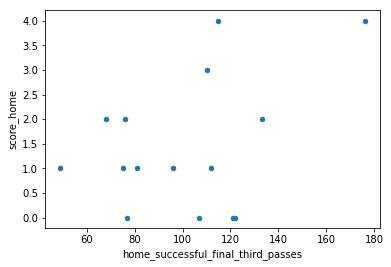

In [73]:
rsl_matches_17_home.plot(x='home_successful_final_third_passes', y='score_home', kind='scatter')

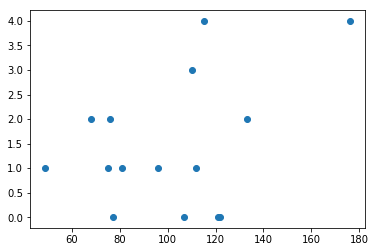

In [72]:
# does number of successful passes in the final third influence how much RSL scores?
plt.scatter(rsl_matches_17_home.home_successful_final_third_passes, 
         rsl_matches_17_home.score_home)
# plt.scatter(rsl_matches_17_away.away_successful_final_third_passes, 
#          rsl_matches_17_away.score_away)
plt.show()

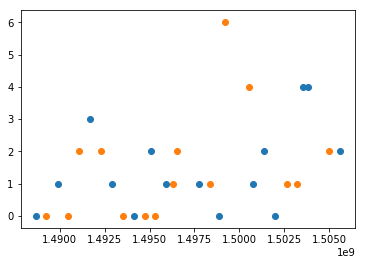

In [56]:
plt.scatter(rsl_matches_17_home.date, 
         rsl_matches_17_home.score_home)
plt.scatter(rsl_matches_17_away.date, 
         rsl_matches_17_away.score_away)
plt.show()

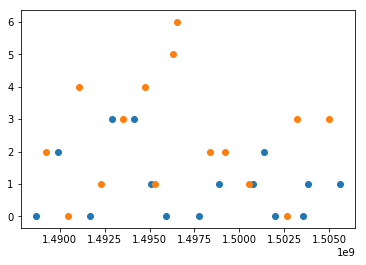

In [57]:
plt.scatter(rsl_matches_17_home.date, 
         rsl_matches_17_home.score_away)
plt.scatter(rsl_matches_17_away.date, 
         rsl_matches_17_away.score_home)
plt.show()

In [71]:
# what are the most correleated stats with scoring goals?
# besides directly related stuff, keeper and aerial saves were suprisingly correlated
with pd.option_context('display.max_rows', 200):
    print(matches.corr().score_home)

match_id                                 -0.018515
competition_id                            0.010669
season_id                                 0.018627
date                                     -0.008998
score_home                                1.000000
score_away                               -0.007807
half_score_home                           0.697686
half_score_away                          -0.014827
away_equalizer_goal                      -0.023249
away_matchwinner_goal                    -0.209569
away_outofplayconceded_f24               -0.044181
away_savesbody_f24                        0.032857
away_savescaught_f24                     -0.009510
away_savescollected_f24                  -0.000564
away_savesdiving_f24                      0.114469
away_savesfeet_f24                        0.100100
away_savesfingertip_f24                   0.007689
away_saveshands_f24                       0.081409
away_savesparrieddanger_f24               0.137817
away_savesparriedsafe_f24      